Independent research conducted in order to measure U.S. Senate (2018-2020) representatives' ideology relative to the partisanship of their constituents.

In [3]:
#import packages
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt


In [4]:
#read in DW nominate and PVI data
data = pd.read_csv("DW by PVI.csv")


#seperate by party
reps = data[data['Party'] == "R"]
dems = data[data['Party'] == "D"]

#generate z scores
data['PVI_Z'] = stats.zscore(data['PVI'])
data['DW_Z'] = stats.zscore(data['DW Score'])

#show data
print(data.head())



  State Party       Name  DW Score  PVI     PVI_Z      DW_Z
0    AL     D      JONES    -0.087   14  1.007622 -0.428384
1    AL     R     SHELBY     0.429   14  1.007622  0.733141
2    AK     R  MURKOWSKI     0.211    9  0.528931  0.242419
3    AK     R   SULLIVAN     0.482    9  0.528931  0.852445
4    AZ     D     SINEMA    -0.102    5  0.145977 -0.462150


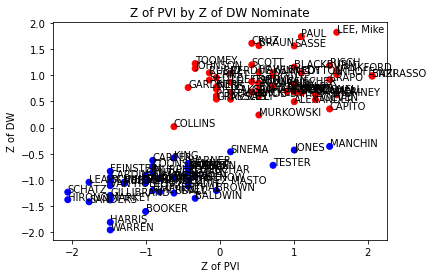

In [5]:

#"Z of PVI by Z of DW Nominate, both parties
fig, ax = plt.subplots()
colors = {'R':'red', 'D':'Blue'}

ax.scatter(data['PVI_Z'], data['DW_Z'], c=data['Party'].map(colors))

for i, txt in enumerate(data['Name']):
    ax.annotate(txt, (data['PVI_Z'][i], data['DW_Z'][i]))

   
ident = [0.0, 2.0]
#plt.plot([-2,2],[-2,2], 'black', linewidth=2)
#plt.ylim(-1,1.5)
plt.title("Z of PVI by Z of DW Nominate")
plt.xlabel("Z of PVI")
plt.ylabel("Z of DW")
plt.show()


<bound method NDFrame.head of    State Party     Name  DW Score  PVI     PVI_Z      DW_Z      diff
75    PA     R   TOOMEY     0.648    0 -0.332714  1.226114  1.558828
98    WI     R  JOHNSON     0.606    0 -0.332714  1.131571  1.464285
10    CO     R  GARDNER     0.444   -1 -0.428453  0.766906  1.195359
16    FL     R    RUBIO     0.569    2 -0.141238  1.048283  1.189521
86    TX     R     CRUZ     0.820    8  0.433192  1.613289  1.180097
..   ...   ...      ...       ...  ...       ...       ...       ...
95    WV     R   CAPITO     0.262   19  1.486314  0.357221 -1.129093
70    OH     D    BROWN    -0.431    3 -0.045499 -1.202734 -1.157235
0     AL     D    JONES    -0.087   14  1.007622 -0.428384 -1.436007
52    MT     D   TESTER    -0.217   11  0.720407 -0.721017 -1.441424
96    WV     D  MANCHIN    -0.056   19  1.486314 -0.358603 -1.844917

[101 rows x 8 columns]>


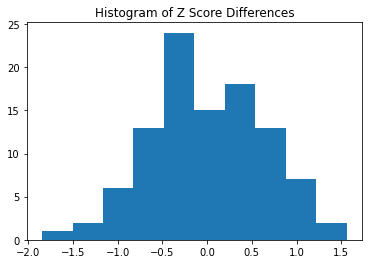

In [20]:
#generate column for difference in z scores for both parties
data['diff']= data['DW_Z'] - data['PVI_Z']

data = data.sort_values(by=['diff'], ascending=False)

print(data.head)

#show histogram of these differences
plt.hist(data['diff'])
plt.title("Histogram of Z Score Differences")
plt.show()

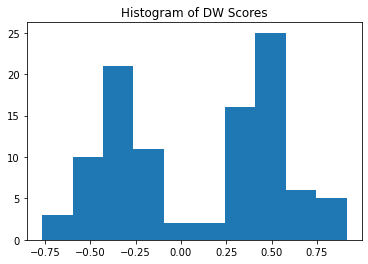

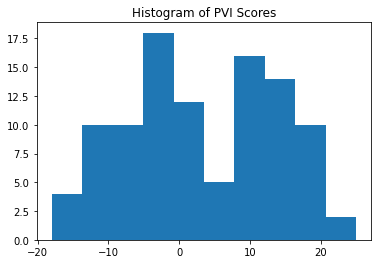

In [7]:
#histograms of DW scores and PVIs
plt.hist(data['DW Score'])
plt.title("Histogram of DW Scores")
plt.show()

plt.hist(data['PVI'])
plt.title("Histogram of PVI Scores")
plt.show()



Next, conduct the same analysis but only one party at a time. This may be more fitting as the parties are so polarized that it may not make sense to compare partisan value over replacement across parties.

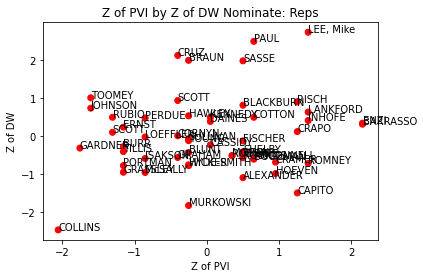

In [10]:

#Z of PVI by Z of DW Nominate: Reps
reps = reps.reset_index()


reps['PVI_Z'] = stats.zscore(reps['PVI'])
reps['DW_Z'] = stats.zscore(reps['DW Score'])


fig, ax = plt.subplots()
colors = {'R':'red', 'D':'Blue'}

ax.scatter(reps['PVI_Z'], reps['DW_Z'], c=reps['Party'].map(colors))

for i, txt in enumerate(reps['Name']):
    ax.annotate(txt, (reps['PVI_Z'][i], reps['DW_Z'][i]))

   
ident = [0.0, 2.0]
#plt.plot([-1,1],[-2,1], 'black', linewidth=2)
#plt.plot([0, 1], [0, 1], transform=ax.transAxes)
plt.title("Z of PVI by Z of DW Nominate: Reps")
plt.xlabel("Z of PVI")
plt.ylabel("Z of DW")
plt.show()

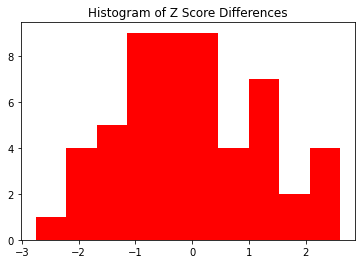

In [12]:
#Rep z score differences
reps['diff']= reps['DW_Z'] - reps['PVI_Z']

reps = reps.sort_values(by=['diff'], ascending=False)


plt.hist(reps['diff'], color = 'red')
plt.title("Histogram of Z Score Differences")
plt.show()

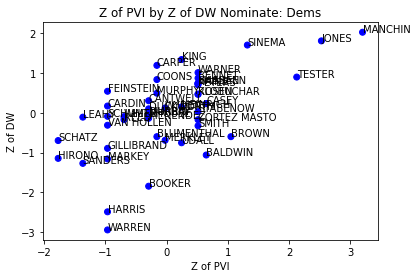

In [13]:

#Z of PVI by Z of DW Nominate: Dems
dems = dems.reset_index()


dems['PVI_Z'] = stats.zscore(dems['PVI'])
dems['DW_Z'] = stats.zscore(dems['DW Score'])


fig, ax = plt.subplots()
colors = {'R':'red', 'D':'Blue'}

ax.scatter(dems['PVI_Z'], dems['DW_Z'], c=dems['Party'].map(colors))

for i, txt in enumerate(dems['Name']):
    ax.annotate(txt, (dems['PVI_Z'][i], dems['DW_Z'][i]))

   
ident = [0.0, 2.0]
#plt.plot([-1,1],[-2,1], 'black', linewidth=2)
#plt.plot([0, 1], [0, 1], transform=ax.transAxes)
plt.title("Z of PVI by Z of DW Nominate: Dems")
plt.xlabel("Z of PVI")
plt.ylabel("Z of DW")
plt.show()

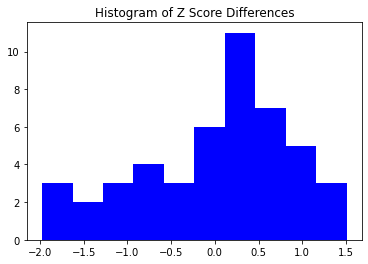

In [15]:
#Z score differences, Dems
dems['diff']= dems['DW_Z'] - dems['PVI_Z']

dems = dems.sort_values(by=['diff'], ascending=False)

plt.hist(dems['diff'], color = 'blue')
plt.title("Histogram of Z Score Differences")
plt.show()

